<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2006%EC%9D%BC/11%EC%9B%94_6%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 미니 프로젝트(술 소비량)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/drinks.csv')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


<Axes: >

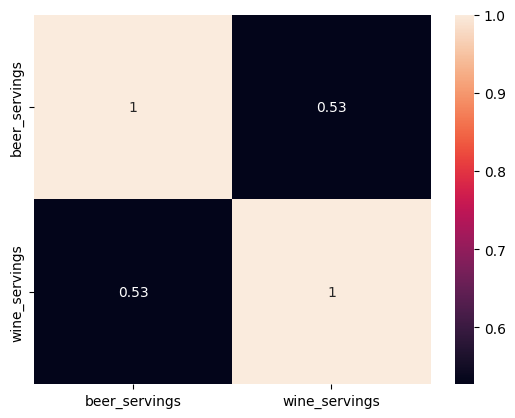

In [ ]:
# 맥주와 와인 소비량의 상관관계 분석
drink = data[['beer_servings','wine_servings']]
corr_data = drink.corr()
sns.heatmap(corr_data,annot=True)

# 강사님 ver.
# corr = data[['beer_servings','wine_servings']].corr(method='pearson')

In [ ]:
# 여러 피쳐들 간의 상관관계
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = data[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


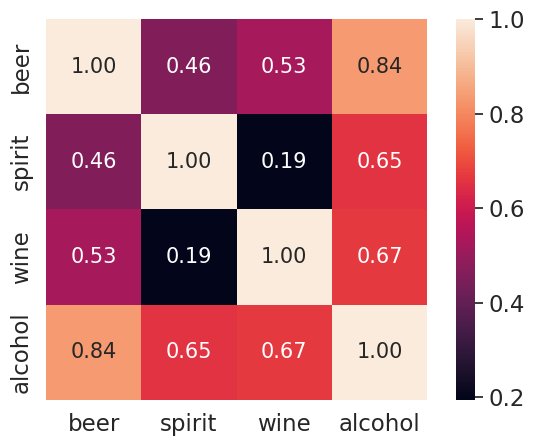

In [ ]:
# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

<Axes: ylabel='continent'>

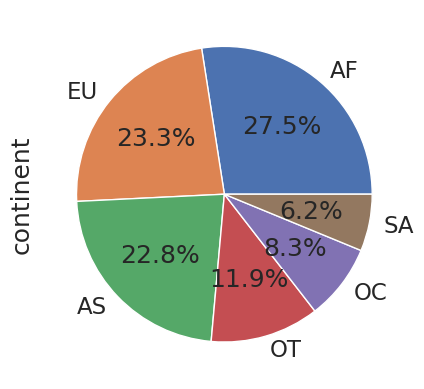

In [ ]:
# 대륙에 정보 없는 국가 ot로 처리
data['continent'].fillna('OT',inplace=True)
data['continent'].isnull().sum()

# 파이 차트 시각화
data['continent'].value_counts().plot.pie(autopct='%.1f%%')

# # 강사님 ver.
# data['continent'] = data['continent'].fillna('OT')
# labels = data['continent'].value_counts().index.tolist()
# fracs1 = data['continent'].value_counts().values.tolist()
# explode = (0, 0, 0, 0.25, 0, 0)

# plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
# plt.title('null data to 'OT'')
# plt.show()

In [ ]:
# 대륙별 spirit_servings 평균, 최대, 최소, 합계 계산
data.groupby('continent')['spirit_servings'].describe()

# 강사님 ver.
# result = data.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
# result.head()


,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.339623,28.102794,0.0,1.00,3.0,19.00,152.0
AS,44.0,60.840909,84.362160,0.0,1.00,16.0,98.00,326.0
EU,45.0,132.555556,77.589115,0.0,81.00,122.0,173.00,373.0
OC,16.0,58.437500,70.504817,0.0,18.00,37.0,65.25,254.0
OT,23.0,165.739130,94.993884,68.0,101.00,137.0,190.50,438.0
SA,12.0,114.750000,77.077440,25.0,65.75,108.5,148.75,302.0


In [ ]:
# 전체 평균 보다 높은 대륙 구하기
max = data['total_litres_of_pure_alcohol'].mean()  # 4.71
data1 = data.groupby('continent').total_litres_of_pure_alcohol.mean()

# 강사님 ver.
total_mean = data.total_litres_of_pure_alcohol.mean()
continent_mean = data.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [ ]:
# 평균 beer_servings이 가장 높은 대륙
beer = data.groupby('continent').beer_servings.mean()
beer.nlargest(1)

# 강사님 ver.
beer_continent = data.groupby('continent').beer_servings.mean().idxmax()  # idxmax 알아두면 좋
print(beer_continent)

continent
EU    193.777778
Name: beer_servings, dtype: float64

<Axes: xlabel='continent'>

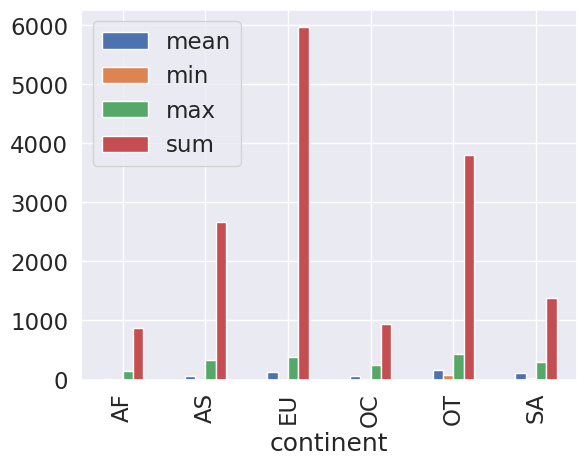

In [ ]:
# 대륙별 spirit_servings 평균, 최대, 최소, 합계 시각화
result = data.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.plot.bar()

# 강사님 ver. - 공부 필요
# n_groups = len(result.index)
# means = result['mean'].tolist()
# mins = result['min'].tolist()
# maxs = result['max'].tolist()
# sums = result['sum'].tolist()

# index = np.arange(n_groups)
# bar_width = 0.1

# rects1 = plt.bar(index, means, bar_width,
#                  color='r',
#                  label='Mean')

# rects2 = plt.bar(index + bar_width, mins, bar_width,
#                  color='g',
#                  label='Min')

# rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
# rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
#                  color='b',
#                  label='Max')

# rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
#                  color='y',
#                  label='Sum')

# plt.xticks(index, result.index.tolist())
# plt.legend()
# plt.show()

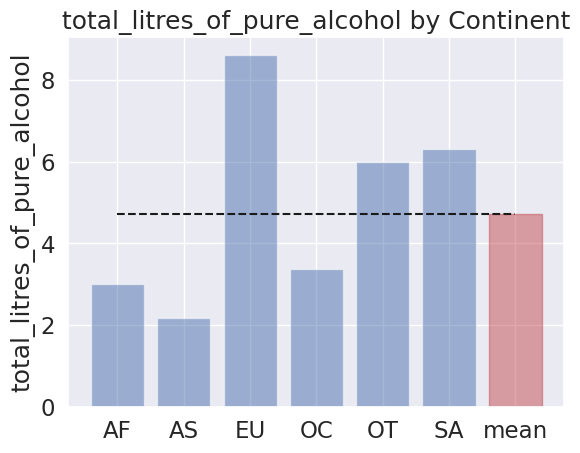

In [ ]:
import numpy as np
# 대륙별 total_litres_of_pure_alcohol 막대그래프 시각화
# result = data.groupby('continent').total_litres_of_pure_alcohol.agg(['mean'])
# result.plot.bar()

# 강사님 ver.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')

plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

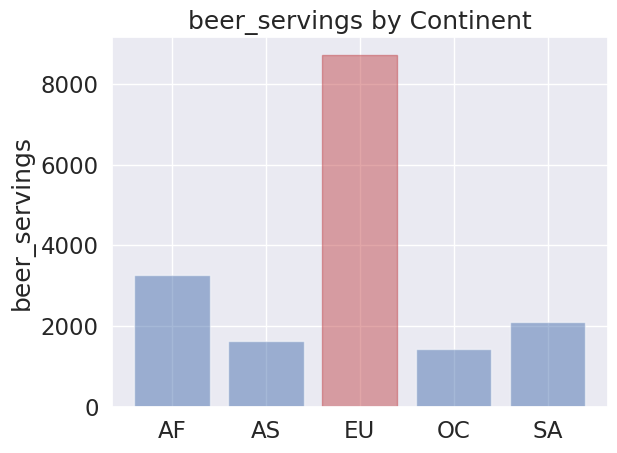

In [ ]:
# 대륙별 beer_servings 막대그래프 시각화
# result = data.groupby('continent').beer_servings.agg(['mean'])
# result.plot.bar()

# 강사님 ver.
beer_group = data.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()

y_pos = np.arange(len(continents))

alcohol = beer_group.tolist()


bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)

bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

# 번외) 람다 함수(lambda)

In [ ]:
# lambda 뒤에 오는게 매개변수, : 뒤에 오는게 실질적 몸체
ref = lambda s:print(s)
ref('Oh')


Oh


In [ ]:
# 람다 함수의 형태
# lambda args : expression

In [ ]:
lambda n1, n2 : n1 + n2
# x lambda n1, n2: return n1 + n2 실제로 return을 넣으면 안됨
# 상황에 따라 알아 하기때문에 return 쓸 필요 ㄴㄴ


In [ ]:
f2 = lambda s:len(s)
f2('simple')

6

In [ ]:
def fct_fac(n):
    return lambda x : x**n

f2 = fct_fac(2)
f3 = fct_fac(3)

f2(4)
f3(4)

64

# Pandas 정리 문제

In [ ]:
# import pandas as pd
# data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/netflix.csv')
data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/netflix.csv', parse_dates=['date_added'])
# 위 코드로 하면 데이터 타입이 자동으로 변경되서 불려옴
data.head()
data.dtypes
data.nunique()

title         5780
director      3024
date_added    1092
type             2
dtype: int64

In [ ]:
# 제목이 Limitless 인 모든 컨텐츠 찾기
title = data[data.title=='Limitless']
title

,title,director,date_added,type
1559,Limitless,Neil Burger,2019-05-16,Movie
2564,Limitless,NaN,2016-07-01,TV Show
4579,Limitless,Vrinda Samartha,2019-10-01,Movie


In [ ]:
# 'Robert Rodriguez' 감독이 제작하고 유형이 'Movie'인 모든 컨텐츠를 찾아보세요.
title = data[(data.director=='Robert Rodriguez') & (data.type=='Movie')]
title

,title,director,date_added,type
1384,Spy Kids: All the Time in the World,Robert Rodriguez,2019-02-19,Movie
1416,Spy Kids 3: Game Over,Robert Rodriguez,2019-04-01,Movie
1460,Spy Kids 2: The Island of Lost Dreams,Robert Rodriguez,2019-03-08,Movie
2890,Sin City,Robert Rodriguez,2019-10-01,Movie
3836,Shorts,Robert Rodriguez,2019-07-01,Movie
3883,Spy Kids,Robert Rodriguez,2019-04-01,Movie


In [ ]:
# 등록된 날짜가 '2019-07-31'이거나 감독이 'Robert Altman'인 모든 컨텐츠를 찾아보세요.
title = data[(data.director=='Robert Altman') | (data.date_added=='2019-07-31')]
title


,title,director,date_added,type
611,Popeye,Robert Altman,2019-11-24,Movie
1028,The Red Sea Diving Resort,Gideon Raff,2019-07-31,Movie
1092,Gosford Park,Robert Altman,2019-11-01,Movie
3473,Bangkok Love Stories: Innocence,NaN,2019-07-31,TV Show
5117,Ramen Shop,Eric Khoo,2019-07-31,Movie


In [ ]:
# 감독이 'Orson Welles', 'Aditya Kripalani' 또는'Sam Raimi' 인 모든 컨텐츠를 찾아보세요.
direc = data[(data.director=='Orson Welles') | (data.director=='Aditya Kripalani') | (data.director=='Sam Raimi')]
direc

,title,director,date_added,type
946,The Stranger,Orson Welles,19-Jul-18,Movie
1870,The Gift,Sam Raimi,20-Nov-19,Movie
3706,Spider-Man 3,Sam Raimi,1-Nov-19,Movie
4243,Tikli and Laxmi Bomb,Aditya Kripalani,1-Aug-18,Movie
4475,The Other Side of the Wind,Orson Welles,2-Nov-18,Movie
5115,Tottaa Pataaka Item Maal,Aditya Kripalani,25-Jun-19,Movie


In [ ]:
# 2019년 5월 1일과 2019년 6월 1일 사이에 등록된 모든 컨텐츠를 찾아보세요.
con = data[(data.date_added >= '2019-05-01') & (data.date_added <= '2019-06-01') ]
con

# 강사님 ver.
# con =data['date_added'].between('2019-05-01', '2019-06-01')
# data[con].head()

,title,director,date_added,type
29,Chopsticks,Sachin Yardi,2019-05-31,Movie
60,Away From Home,NaN,2019-05-08,TV Show
82,III Smoking Barrels,Sanjib Dey,2019-06-01,Movie
108,Jailbirds,NaN,2019-05-10,TV Show
124,Pegasus,Han Han,2019-05-31,Movie


In [ ]:
# director 열에서 NaN값이 있는 모든 행을 삭제해보세요.
data.dropna(subset='director').head()

,title,director,date_added,type
1,A Patch of Fog,Michael Lennox,2017-04-15,Movie
3,Uriyadi 2,Vijay Kumar,2019-08-02,Movie
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
5,Schubert In Love,Lars Büchel,2018-03-01,Movie
6,We Have Always Lived in the Castle,Stacie Passon,2019-09-14,Movie


In [ ]:
# 넷플릭스가 컨텐츠를 단 하나만 등록한 날짜를 식별하세요
data.drop_duplicates(subset='date_added',keep=False)

,title,director,date_added,type
4,Shrek the Musical,Jason Moore,2013-12-29,Movie
12,Without Gorky,Cosima Spender,2017-05-31,Movie
30,Anjelah Johnson: Not Fancy,Jay Karas,2015-10-02,Movie
38,One Last Thing,Tim Rouhana,2019-08-25,Movie
70,Marvel's Iron Man & Hulk: Heroes United,Leo Riley,2014-02-16,Movie
...,...,...,...,...
5748,Menorca,John Barnard,2017-08-27,Movie
5749,Green Room,Jeremy Saulnier,2018-11-12,Movie
5788,Chris Brown: Welcome to My Life,Andrew Sandler,2017-10-07,Movie
5789,A Very Murray Christmas,Sofia Coppola,2015-12-04,Movie


# 오전 drink.csv 이어서

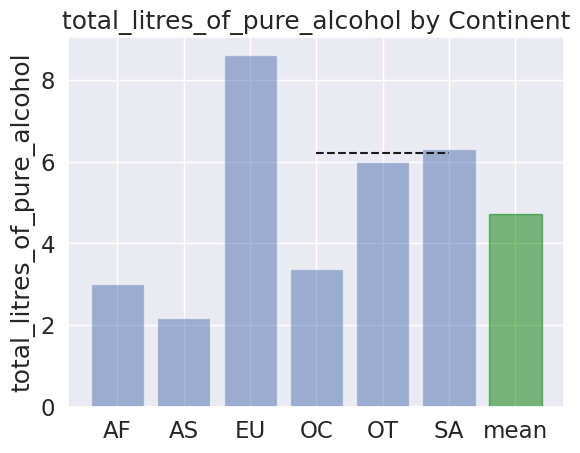

In [ ]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 그래프 색상을 변경합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('green')
plt.plot([3., 5], [total_mean + 1.5, total_mean + 1.5], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [ ]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.
africa = data.loc[data['continent']=='AF']
europe = data.loc[data['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)


# 메모
# p-value가 낮다 --> 귀무가설이 기각 의미
# 0.05 ~ 0.01이 보통 기준으로 삼음 --> 이 범위 안에 있으면 유의 확률

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


In [ ]:
# total_servings 피처를 생성합니다.
data['total_servings'] = data['beer_servings'] + data['wine_servings'] + data['spirit_servings']

# 술 소비량 대비 알콜 비율 피처를 생성합니다.
data['alcohol_rate'] = data['total_litres_of_pure_alcohol'] / data['total_servings']
data['alcohol_rate'] = data['alcohol_rate'].fillna(0)

# 순위 정보를 생성합니다.
country_with_rank = data[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


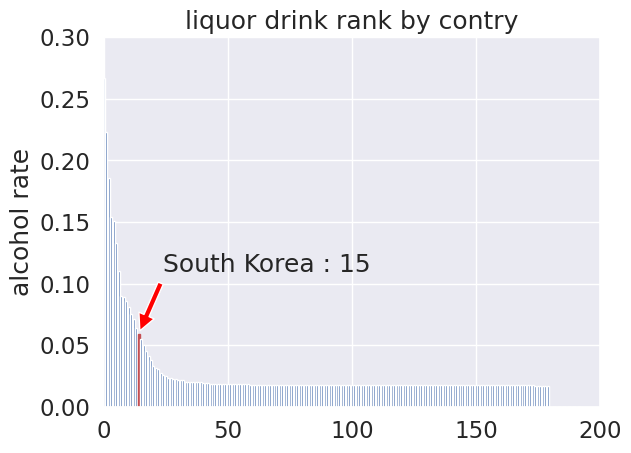

In [ ]:
# 대한민국 술 소비량 시각화
# country_with_rank = data[['country', 'alcohol_rate']]
# country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)

# x_po = np.arange(len(country_with_rank['country']))
# bar_list = plt.bar(x_po, country_with_rank, align='center', alpha=0.5)
# bar_list[country_with_rank[country_with_rank.country=='South Korea']].set_color('red')
# plt.title('liquor drink rank by country')
# plt.show()


# 강사님 ver.
# 국가별 순위 정보를 그래프로 시각화합니다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1),
             xy=(korea_rank, korea_alc_rate),
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()